### Dataset Relation

`ais_tracks` & `radar_tracks`: both contain 27416 corresponding tracks identified by both radar & ais. Can consider them as training

`tracks_tagged`: 9013 tagged radar tracks by users in M2. 

`tagged_detections`: 6756272 timestamps and 9020 individual tracks in total, contains ALL tracks in `tracks_tagged`. The remaining 7 tracks are from AIS, 5 of which overlap with `ais_tracks`

`radar_detections`: 7387790 timestamps and 19947 radar tracks; 15345 of which are associated with radar/ais_tracks


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
ais_tracks_path = '../data/tracks_ais.csv'
radar_tracks_path = '../data/tracks_radar.csv'
radar_detections_path = '../data/detections_radar.csv'
tagged_detections_path = '../data/detections_tagged.csv'
tracks_tagged_path = '../data/tracks_tagged.csv'

ais_tracks = pd.read_csv(ais_tracks_path)
radar_tracks = pd.read_csv(radar_tracks_path)
radar_detections = pd.read_csv(radar_detections_path)
tagged_detections = pd.read_csv(tagged_detections_path)
tracks_tagged = pd.read_csv(tracks_tagged_path)

print("Length of ais_tracks:", len(ais_tracks))
print("Length of radar_tracks:", len(radar_tracks))
print("Length of radar_detections:", len(radar_detections))
print("Length of tagged_detections:", len(tagged_detections))
print("Length of tracks_tagged:", len(tracks_tagged))

Length of ais_tracks: 27416
Length of radar_tracks: 27416
Length of radar_detections: 7387790
Length of tagged_detections: 6756272
Length of tracks_tagged: 9013


In [2]:
ais_tracks_id = set(ais_tracks['id_track'])
radar_tracks_id = set(radar_tracks['id_track'])
radar_detections_id = set(radar_detections['id_track'])
tagged_detections_id = set(tagged_detections['id_track'])
tracks_tagged_id = set(tracks_tagged['id_track'])

print("Unique ais_tracks_id count:", len(ais_tracks_id))
print("Unique radar_tracks_id count:", len(radar_tracks_id))
print("Unique radar_detections_id count:", len(radar_detections_id))
print("Unique tagged_detections_id count:", len(tagged_detections_id))
print("Unique tracks_tagged_id count:", len(tracks_tagged_id))

Unique ais_tracks_id count: 27416
Unique radar_tracks_id count: 27416
Unique radar_detections_id count: 19947
Unique tagged_detections_id count: 9020
Unique tracks_tagged_id count: 9013


In [5]:
len(set(radar_detections['assoc_id']) & set(radar_tracks['id_track']))
len(set(ais_tracks['id_track']) & set(radar_tracks['id_track']))

27416

In [3]:
len1 = len(set(radar_detections['assoc_id']))
len2 = len(set(radar_detections['id_track']))
len3 = len(set(radar_detections['assoc_id']) & set(ais_tracks['id_track']))
len4 = len(radar_detections[['id_track', 'assoc_id']].drop_duplicates())

print(f'Number of unique assoc_id: {len1}')
print(f'Number of unique id_track: {len2}')
print(f'Number of unique assoc_id that are also in ais_tracks: {len3}')
print(f'Missing in AIS: {len1 - len3} tracks')
print(f'Total number of unique (id_track, assoc_id) pairings: {len4}')


Number of unique assoc_id: 16591
Number of unique id_track: 19947
Number of unique assoc_id that are also in ais_tracks: 15345
Missing in AIS: 1246 tracks
Total number of unique (id_track, assoc_id) pairings: 19947


In [4]:
missing_assoc_id = set(radar_detections['assoc_id']) - (set(radar_detections['assoc_id']) & set(ais_tracks['id_track']))
missing_rows = radar_detections[radar_detections['assoc_id'].isin(missing_assoc_id)]

missing_rows[['id_track', 'assoc_id']].sample(5, ignore_index=True)

,id_track,assoc_id
0,30792302,30793329
1,30160577,30160941
2,33364454,33364377
3,38757770,38757672
4,43874199,43874157


In [5]:
import pandas as pd

# Assuming radar_detections and ais_tracks are already loaded as DataFrames
filtered_radar_detections = radar_detections[~radar_detections['assoc_id'].isin(ais_tracks['id_track'])]
filtered_radar_detections['assoc_id'].sample(3).tolist()

[34577367, 30168189, 38771602]

### Radar Detections

In [6]:
# Group by assoc_id and collect all unique id_track values into sets
assoc_track_df = radar_detections.groupby('assoc_id')['id_track'].apply(lambda x: set(x.dropna().unique())).reset_index()

# Display the first few rows
print("Number of unique associated IDs:", len(assoc_track_df))
print("\nFirst few rows:")
display(assoc_track_df.head())

# Display some statistics
print("\nStatistics about track sets:")
print("Average number of tracks per assoc_id:", assoc_track_df['id_track'].apply(len).mean())
print("Maximum number of tracks for an assoc_id:", assoc_track_df['id_track'].apply(len).max())
print("Number of assoc_ids with no tracks:", assoc_track_df['id_track'].apply(len).eq(0).sum())

Number of unique associated IDs: 16591

First few rows:


,assoc_id,id_track
0,29900862,{29901194}
1,29901144,{29901445}
2,29902962,{29903214}
3,29903133,{29903546}
4,29904658,{29904868}



Statistics about track sets:
Average number of tracks per assoc_id: 1.2022783436803086
Maximum number of tracks for an assoc_id: 25
Number of assoc_ids with no tracks: 0


### Size EDAs

Total number of AIS tracks with size info: 21979


/var/folders/jm/bv3tgs257hx9tx764_p9xq0w0000gn/T/ipykernel_56782/1384951227.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ais_tracks_with_size = ais_tracks_with_size[length_width_filter]


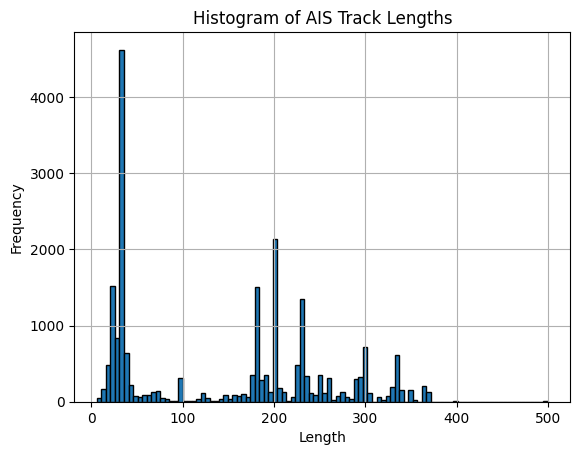

In [7]:
ais_tracks['length'] = ais_tracks['dim_a'] + ais_tracks['dim_b']
ais_tracks['width'] = ais_tracks['dim_c'] + ais_tracks['dim_d']

ais_tracks_with_size = ais_tracks.dropna(subset=['width', 'length'])
length_width_filter = (ais_tracks['length'] > 0) & (ais_tracks['width'] > 0)
ais_tracks_with_size = ais_tracks_with_size[length_width_filter]

print(f'Total number of AIS tracks with size info: {len(ais_tracks_with_size)}')

ais_tracks_with_size['length'].describe()
ais_tracks_with_size['width'].describe()
ais_tracks_with_size['length'].hist(bins=100, edgecolor='black')
plt.title('Histogram of AIS Track Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

type_m2
cargo_ship                 10263
passenger_ship              3855
other                       2738
tanker_ship                 1410
tug                         1061
military_ship                776
towing_ship                  721
pleasure_craft               518
commercial_fishing_boat      266
search_and_rescue_boat       178
sailboat                      69
law_enforcement_boat          54
high_speed_craft              35
unknown                       33
pilot_boat                     2
Name: count, dtype: int64


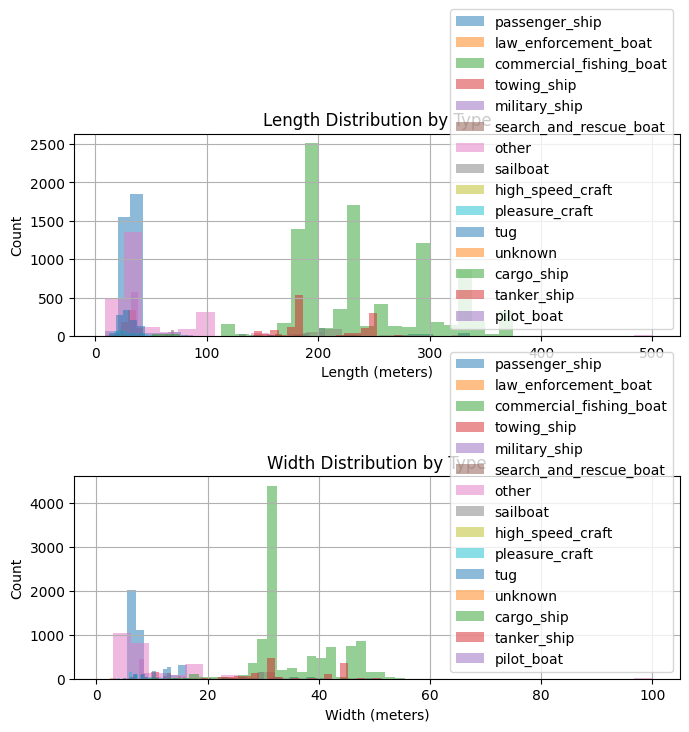


Summary Statistics:

Length Statistics by Type:
                           count        mean        std    min    25%    50%  \
type_m2_agg                                                                    
cargo_ship               10263.0  239.686544  59.866880   26.0  199.0  229.0   
commercial_fishing_boat    266.0   28.304511  12.463128   10.0   22.0   23.0   
high_speed_craft            35.0   32.457143  15.207086   11.0   22.0   22.0   
law_enforcement_boat        54.0   43.759259  36.949193   10.0   26.0   26.0   
military_ship              776.0   71.891753  68.837095   13.0   33.0   33.0   
other                     2738.0   61.765522  66.325686    9.0   32.0   32.0   
passenger_ship            3855.0   45.219196  57.380972    9.0   30.0   32.0   
pilot_boat                   2.0   20.000000   2.828427   18.0   19.0   20.0   
pleasure_craft             518.0   35.760618  20.174400    6.0   22.0   29.5   
sailboat                    69.0   36.492754  15.327429   15.0   33.0  

In [8]:
# Get the top types by count
type_counts = ais_tracks_with_size['type_m2'].value_counts()
top_types = type_counts.head(len(type_counts))
print(top_types)

# Create a new column with aggregated types
ais_tracks_with_size['type_m2_agg'] = ais_tracks_with_size['type_m2'].apply(
    lambda x: x if x in top_types else 'other'
)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7))

# Plot length distribution for each type
for type_name in ais_tracks_with_size['type_m2_agg'].unique():
    type_data = ais_tracks_with_size[ais_tracks_with_size['type_m2_agg'] == type_name]
    ax1.hist(type_data['length'], bins=30, alpha=0.5, label=type_name)

ax1.set_title('Length Distribution by Type')
ax1.set_xlabel('Length (meters)')
ax1.set_ylabel('Count')
ax1.legend()
ax1.grid(True)

# Plot width distribution for each type
for type_name in ais_tracks_with_size['type_m2_agg'].unique():
    type_data = ais_tracks_with_size[ais_tracks_with_size['type_m2_agg'] == type_name]
    ax2.hist(type_data['width'], bins=30, alpha=0.5, label=type_name)

ax2.set_title('Width Distribution by Type')
ax2.set_xlabel('Width (meters)')
ax2.set_ylabel('Count')
ax2.legend()
ax2.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Print summary statistics for each type
print("\nSummary Statistics:")
print("\nLength Statistics by Type:")
print(ais_tracks_with_size.groupby('type_m2_agg')['length'].describe())
print("\nWidth Statistics by Type:")
print(ais_tracks_with_size.groupby('type_m2_agg')['width'].describe())

# Print the original type counts for reference
print("\nOriginal Type Counts:")
print(type_counts)

In [9]:
print ("Noted that class-b vessels don't have corresponding size information in AIS_data")

Noted that class-b vessels don't have corresponding size information in AIS_data


### Multinomial Regression

In [10]:
features_subset = ['min_speed', 'max_speed', 'avg_speed', 'curviness', 'heading_mean', 'heading_std', 'turning_mean', 'turning_std', 'duration_z', 'distance', 'distance_o']

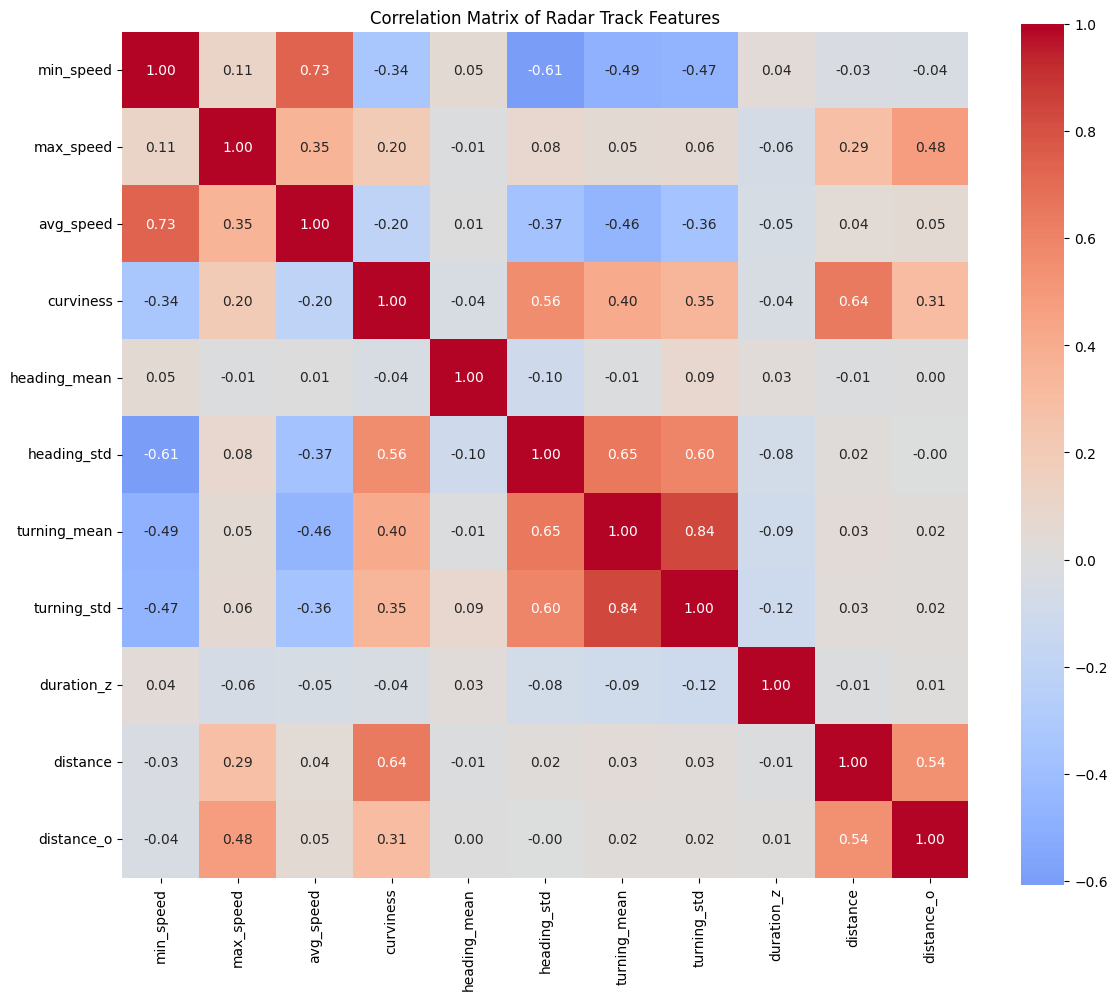


Correlation Matrix:


,min_speed,max_speed,avg_speed,curviness,heading_mean,heading_std,turning_mean,turning_std,duration_z,distance,distance_o
min_speed,1.000000,0.112554,0.733494,-0.336880,0.046730,-0.608027,-0.486225,-0.474190,0.035660,-0.034760,-0.037687
max_speed,0.112554,1.000000,0.353781,0.200083,-0.014489,0.078039,0.045382,0.058330,-0.059690,0.288104,0.480841
avg_speed,0.733494,0.353781,1.000000,-0.199769,0.007473,-0.371574,-0.461684,-0.357434,-0.050340,0.040313,0.047826
curviness,-0.336880,0.200083,-0.199769,1.000000,-0.044173,0.556596,0.403781,0.351250,-0.039631,0.642104,0.306681
heading_mean,0.046730,-0.014489,0.007473,-0.044173,1.000000,-0.102217,-0.013032,0.087647,0.031252,-0.005231,0.002069
heading_std,-0.608027,0.078039,-0.371574,0.556596,-0.102217,1.000000,0.652553,0.596343,-0.078665,0.017086,-0.003271
turning_mean,-0.486225,0.045382,-0.461684,0.403781,-0.013032,0.652553,1.000000,0.839441,-0.093850,0.034796,0.018998
turning_std,-0.474190,0.058330,-0.357434,0.351250,0.087647,0.596343,0.839441,1.000000,-0.117842,0.029287,0.020190
duration_z,0.035660,-0.059690,-0.050340,-0.039631,0.031252,-0.078665,-0.093850,-0.117842,1.000000,-0.011452,0.010991
distance,-0.034760,0.288104,0.040313,0.642104,-0.005231,0.017086,0.034796,0.029287,-0.011452,1.000000,0.541294


In [11]:
# Create correlation matrix for features_subset
correlation_matrix = radar_tracks[features_subset].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Use a diverging color palette
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Round correlation values to 2 decimal places
            square=True)  # Make the plot square

plt.title('Correlation Matrix of Radar Track Features')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# Print the correlation matrix as a table for reference
print("\nCorrelation Matrix:")
display(correlation_matrix)

In [12]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score


# Split features and target
X = radar_tracks[features_subset]  # Features (e.g., avg_speed, curviness, turning_mean, turning_std)

type_counts = radar_tracks['type_m2'].value_counts()
top_types = type_counts.head(len(type_counts)).index

# Create a new column with aggregated types
radar_tracks['type_m2_agg'] = radar_tracks['type_m2'].apply(
    lambda x: x if x in top_types else 'other'
)

y = radar_tracks['type_m2_agg']  # Target (Vessel type category)
print(y.value_counts())

type_m2_agg
cargo_ship                 10263
class_b                     4795
passenger_ship              3902
other                       2863
tanker_ship                 1411
tug                         1176
military_ship                951
towing_ship                  779
pleasure_craft               557
commercial_fishing_boat      292
search_and_rescue_boat       178
unknown                       82
sailboat                      70
law_enforcement_boat          55
high_speed_craft              40
pilot_boat                     2
Name: count, dtype: int64


In [13]:
ship2num = {}
num2ship = {}

num = 0
for vessel in y.unique():
    ship2num[vessel] = num
    num2ship[num] = vessel
    num += 1

y_numeric = y.map(ship2num)


In [14]:
# Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, stratify=y_numeric, random_state=42)

# Define XGBoost model
model = xgb.XGBClassifier(
    objective='multi:softmax',  # Use 'multi:softprob' if you want probability outputs
    num_class=len(y.unique()),
    eval_metric='mlogloss',
    eta=0.1,  # Learning rate
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Perform 4-fold cross-validation
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

print(f"4-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Train on full training set
model.fit(X_train, y_train)

# Test set predictions
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Set Accuracy: {test_accuracy:.4f}")

/Users/liuzehan/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


4-Fold CV Accuracy: 0.7602 ± 0.0033
Test Set Accuracy: 0.7670


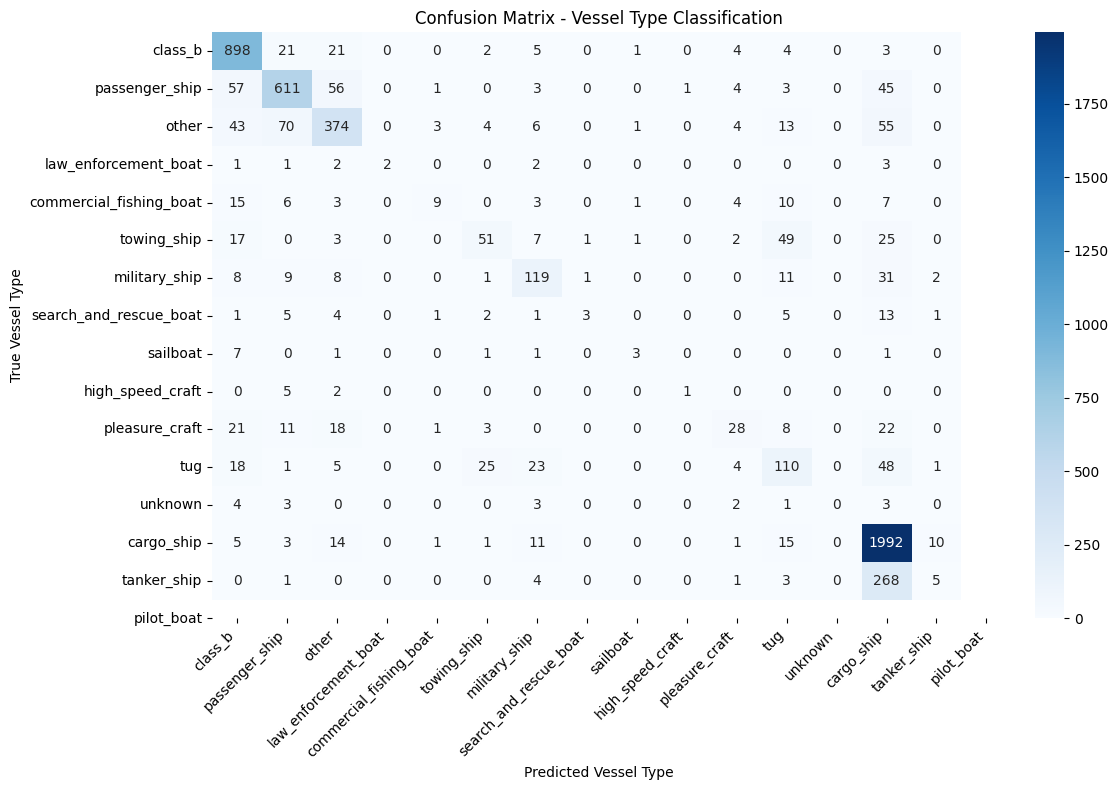

In [15]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure with a larger size
plt.figure(figsize=(12, 8))

# Create heatmap of confusion matrix
sns.heatmap(cm, 
            annot=True,  # Show numbers in cells
            fmt='d',     # Format as integers
            cmap='Blues',  # Use blue color scheme
            xticklabels=list(ship2num.keys()),  # Use vessel type names for x-axis
            yticklabels=list(ship2num.keys()))  # Use vessel type names for y-axis

# Customize the plot
plt.title('Confusion Matrix - Vessel Type Classification')
plt.xlabel('Predicted Vessel Type')
plt.ylabel('True Vessel Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to prevent label cutoff

# Show the plot
plt.show()

# Print classification report for detailed metrics
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred, target_names=list(ship2num.keys())))

In [16]:
print(f'cargo ship & tanker ship get mixed up: but it is probably ok!')

cargo ship & tanker ship get mixed up: but it is probably ok!


### Looking at Hand-Written Labels

In [17]:
# Merge radar_detections with ais_tracks using inner join
merged_detections = radar_detections.merge(
    ais_tracks[['id_track', 'type_m2']], 
    left_on='assoc_id',  
    right_on='id_track',  
    how='inner'  
)

print("Original radar_detections shape:", radar_detections.shape)
print("Merged dataset shape:", merged_detections.shape)
print("\nNumber of matched entries:", len(merged_detections))
print("Number of unmatched radar detections:", len(radar_detections) - len(merged_detections))

# Display the first few rows of the merged dataset
print("\nFirst few rows of merged dataset:")
display(merged_detections.head())

# Display type distribution in merged dataset
print("\nType distribution in merged dataset:")
print(merged_detections['type_m2'].value_counts())

Original radar_detections shape: (7387790, 14)
Merged dataset shape: (6770279, 16)

Number of matched entries: 6770279
Number of unmatched radar detections: 617511

First few rows of merged dataset:


,id_detect,id_track_x,id_site,id_m2,source,speed,course,assoc_str,assoc_id,confidence,cdate,ctime,longitude,latitude,id_track_y,type_m2
0,1313152737,29941750,10,83-0702-1140,radar,0.4,66.0,20,29941830,0.996607,2023-07-02,11:40:11,-117.302575,32.815120,29941830,class_b
1,1313152739,29941750,10,83-0702-1140,radar,0.5,46.9,20,29941830,0.996607,2023-07-02,11:40:17,-117.302553,32.815148,29941830,class_b
2,1313152741,29941750,10,83-0702-1140,radar,0.5,53.3,20,29941830,0.996607,2023-07-02,11:40:24,-117.302543,32.815150,29941830,class_b
3,1313152743,29941750,10,83-0702-1140,radar,0.4,111.7,20,29941830,0.996607,2023-07-02,11:40:30,-117.302525,32.815115,29941830,class_b
4,1313152745,29941750,10,83-0702-1140,radar,0.5,135.1,20,29941830,0.996607,2023-07-02,11:40:36,-117.302515,32.815090,29941830,class_b



Type distribution in merged dataset:
type_m2
cargo_ship                 2256132
class_b                    1057201
passenger_ship             1036305
other                       938480
military_ship               394840
tanker_ship                 327514
tug                         219864
towing_ship                 182832
pleasure_craft              163704
commercial_fishing_boat      63289
search_and_rescue_boat       55641
sailboat                     29707
unknown                      20009
law_enforcement_boat         18493
high_speed_craft              6178
pilot_boat                      90
Name: count, dtype: int64
